Echantillonage 2D
========
TP1 séance 2-3
========
--------
Combal Quentin

Cocogne Romain

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
%matplotlib inline 

 1) Programmez la decimation:
 
   Faire une fonction pour la decimation.
   
   Appliquer la fonction de decimation et montrer les images avant et apres decimation.

décimation: on sous-échantillonne l'image.

In [25]:
#input: img tableau d'entiers correspondant a une image, dec facteur de decimation
#output: tableau d'entiers correspondant à l'image d'origine sous-echantillonnee 
def decimation (img, dec):
    return img[1:img.shape[0]:dec,1:img.shape[1]:dec]

On test la fonction avec plusieur images. on observe bien le résultat attendu. C'est à dire une baisse de résolution des images et des pertes d'information.

In [26]:
#input: img_name nom du fichier image
#ouput: sur sortie standard, images avec different degres de decimation
def test_decim(img_name):
    img = cv2.imread(img_name)
    plt.figure(1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title('image originale'), plt.xticks([]), plt.yticks([])
    for i in range(2,5):
        plt.figure(i)
        plt.imshow(cv2.cvtColor(decimation(img,pow(2,i)), cv2.COLOR_BGR2RGB))
        plt.title('decimation de facteur '+str(pow(2,i))), plt.xticks([]), plt.yticks([])
    plt.show()

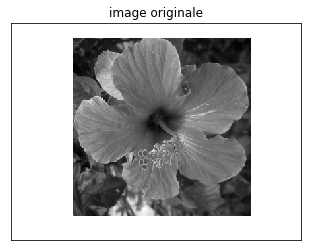

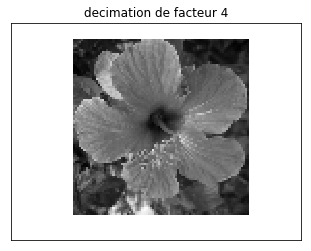

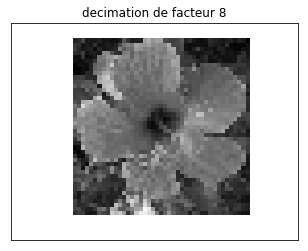

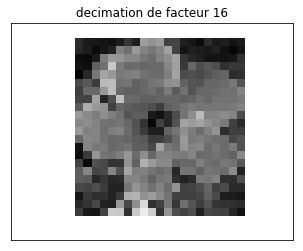

In [27]:
test_decim('AAA.png')

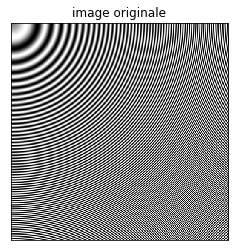

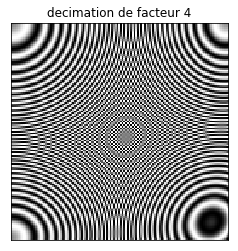

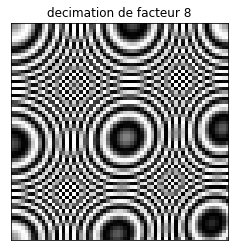

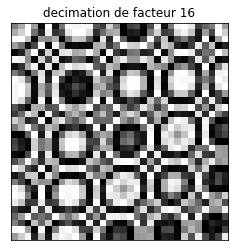

In [28]:
test_decim('imageCercles.png')

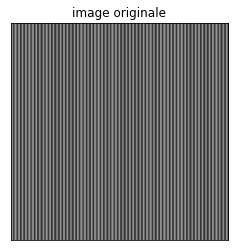

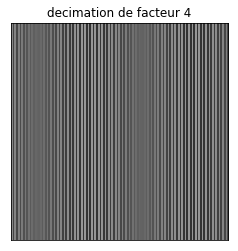

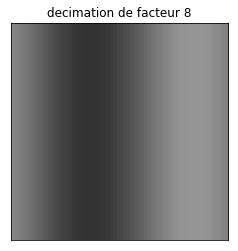

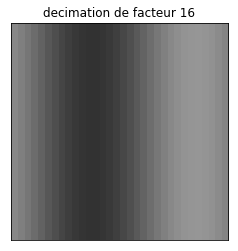

In [29]:
test_decim('imageSinus.png')

2) Examinez le contenu de l’image du sinus avant et après décimation dans le domaine spectral. Indiquez
le phénomène en termes mathématiques.

In [30]:
#input: le facteur de decimation
#output: sur la sortie standard, le decimee et son spectre frequentiel
def sinus_spectre (dec):
    img = cv2.imread('imageSinus.png',0)
    img=decimation(img,dec)
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift+1e-8))

    plt.figure(1),plt.imshow(img, cmap = 'gray')
    plt.title('sinus'), plt.xticks([]), plt.yticks([])
    plt.figure(2),plt.plot(magnitude_spectrum[int(magnitude_spectrum.shape[1]/2)])
    plt.title('Magnitude Spectrum')
    plt.show()
    
    
def spectre(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
#    magnitude_spectrum = 20*np.log(np.abs(fshift+1e-8))
    return fshift


def plot_spectre(img,title):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift+1e-8))
    plt.figure(),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()
    


On observe bien le spectre du sinus. On voit la composante continue en 0 et les deux dirac en environ +/- 100Hz.
<font color='red'>Expliquez mieux</font>

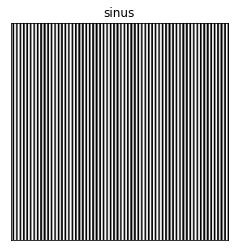

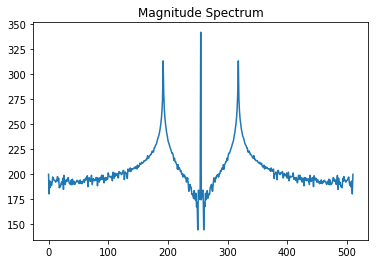

In [31]:
sinus_spectre(1)

On remarque qu'ici les fréquences des dirac sont différentes (environ +/-60Hz). De plus les amplitudes des dirac sont modifiées. On observe donc le phénomène de repliement.

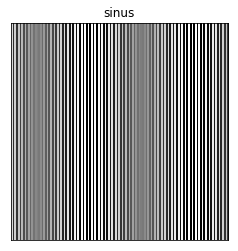

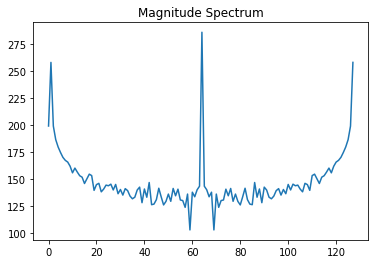

In [32]:
sinus_spectre(4)

Ici les dirac caractéristiques du sinus ont disparu, on ne voit que la composante continue. Il semble donc que tous les dirac sont confondus. Le phénomène de repliement est bien mis en évidence

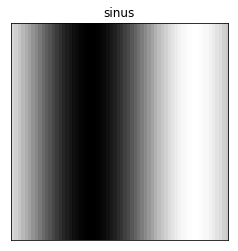

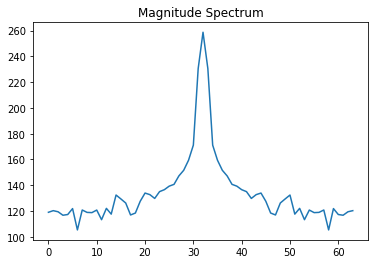

In [33]:
sinus_spectre(8)

On observe de nouveau les 3 dirac distinctement. Cela confirme qu'ils étaient confondus sont le spectre précédent.

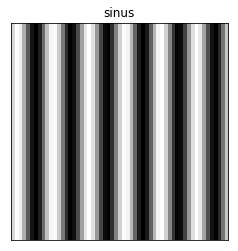

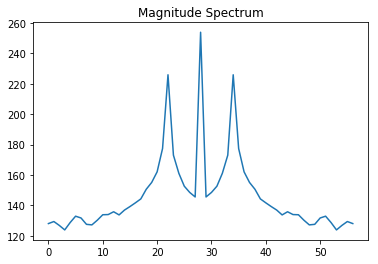

In [34]:
sinus_spectre(9)

3). Proposez un filtre naïf dans le domaine spectral pour éviter le phénomène observé.

On utilise un simple filtre passe bas, carré puis circulaire, pour éviter le repliement observé précedemment. On va supprimer les fréquences trop grandes qui ne pourront pas être échantillonnées correctement. 

Cette solution ne semble pas idéale car le résultat obtenu, bien que cohérent avec les attentes, présente quelques artefacts non désirés.

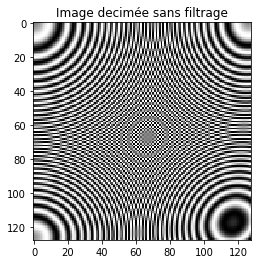

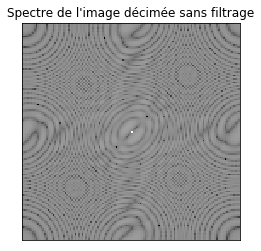

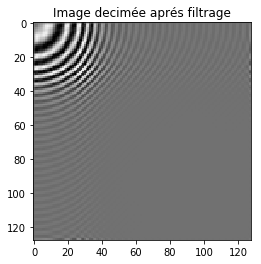

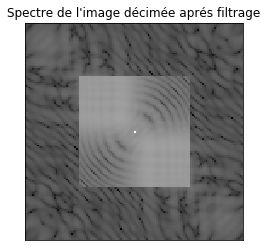

In [35]:
def filtre_naif(img,l_carre) :
    F = spectre(img)
    H = np.zeros((img.shape))
    i = F.shape
    H[int(i[0]/2 - l_carre/2) : int(i[0]/2 + l_carre/2) + 1  , int(i[1]/2 - l_carre/2) : int(i[1]/2 + l_carre/2) +1] = 1
    G = H*F
    return G


img = cv2.imread('imageCercles.png',0)

dec = 4
G = filtre_naif(img,64)
g = np.abs(np.fft.ifft2(G))
#plt.figure(2)
#plt.imshow(np.abs(g), cmap = 'gray')

d2 = decimation(img,dec)
plt.figure()
plt.imshow(d2, cmap = 'gray')
plt.title("Image decimée sans filtrage")
plot_spectre(d2,"Spectre de l'image décimée sans filtrage")

d = np.abs(decimation(g,dec))
plt.figure()
plt.imshow(d, cmap = 'gray')
plt.title("Image decimée aprés filtrage")
plot_spectre(d,"Spectre de l'image décimée aprés filtrage")

Taille du carré = Taille de l'image/decimation

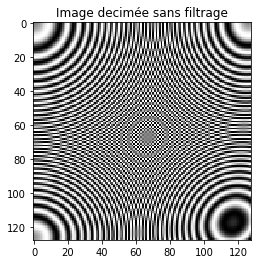

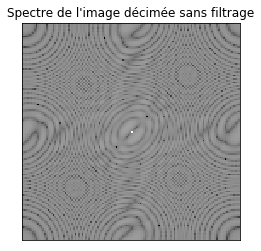

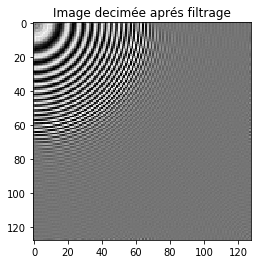

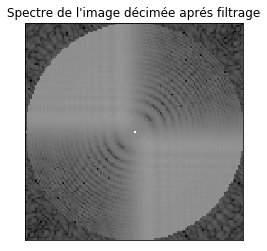

In [36]:
def filtre_naif_cercle (img, r):
    F = spectre(img)
    H = np.zeros((img.shape))
    for i in range(H.shape[0]):
        for j in range(H.shape[1]):
            if((H.shape[0]/2-i)*(H.shape[0]/2-i)+(H.shape[1]/2-j)*(H.shape[1]/2-j)<=r*r):
                H[i,j]=1
    G = H*F
    return G


img = cv2.imread('imageCercles.png',0)

dec = 4
G = filtre_naif_cercle(img,64)
g = np.abs(np.fft.ifft2(G))
#plt.figure()
#plt.imshow(np.abs(g), cmap = 'gray')

d2 = decimation(img,dec)
plt.figure()
plt.imshow(d2, cmap = 'gray')
plt.title("Image decimée sans filtrage")
plot_spectre(d2,"Spectre de l'image décimée sans filtrage")

d = np.abs(decimation(g,dec))
plt.figure()
plt.imshow(d, cmap = 'gray')
plt.title("Image decimée aprés filtrage")
plot_spectre(d,"Spectre de l'image décimée aprés filtrage")

4)Commentez la méthode proposée. Les résultats obtenus présentent-ils des dégradations visibles ? Proposer une explication pour le nouveau phénomène observé.


La majorité de l'image devient illisible, car elle est composée de trop haute fréquences. La décimation effectuée nous fait perdre définitivement les informations présente dans cette zone. 

Les filtres utilisés sont associés à des fonctions discontinues. ils sont donc sujet au phénomène de Gibbs.


Comme l'explique la [page wikipedia du phénoméne de Gibbs](https://en.wikipedia.org/wiki/Ringing_artifacts#Causes), les artefacts visibles en bordure d'image sont dus aux discontinuités de la fonction de filtrage. Pour résoudre le problème, nous allons utiliser des filtres continus.

5)Proposez un ou plusieurs filtres qui permettent d’effectuer une décimation avec des défauts
presque négligeables.


On choisit d'isoler les basses frequences en multipliant le spectre par une fonction continue, ici une fenêtre de hanning en 2d

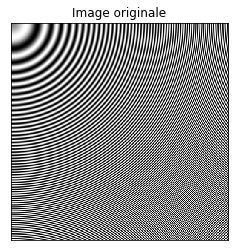

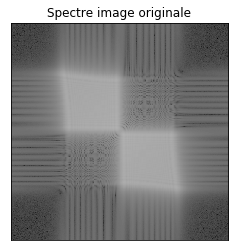

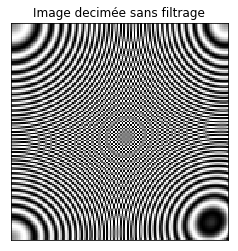

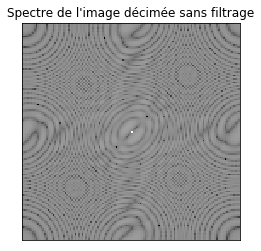

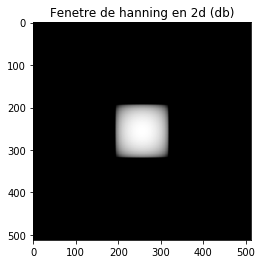

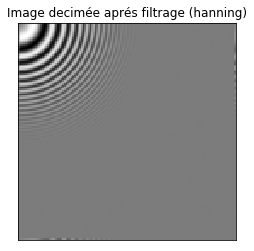

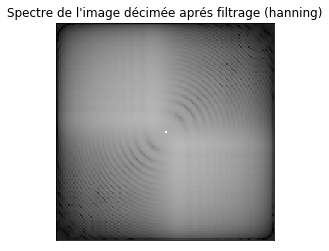

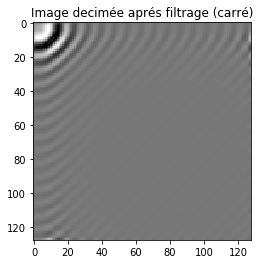

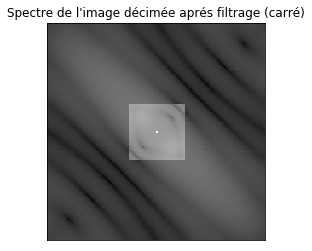

In [37]:
img = cv2.imread('imageCercles.png',0)

plt.imshow(img, cmap = 'gray');plt.xticks([]), plt.yticks([])
plt.title("Image originale")

F = spectre(img)
plot_spectre(img,"Spectre image originale")

eps = 1E-4


#Génération d'une fenêtre de hanning en 2d
dec = 4

x,y = F.shape
W1 = np.hanning(x//dec)
W1 =  np.concatenate((np.zeros((x-W1.size)//2),W1,np.zeros((x-W1.size)//2)))

W2 = np.hanning(y//dec)
W2 =  np.concatenate((np.zeros((y-W2.size)//2),W2,np.zeros((y-W2.size)//2)))

H = np.ones(F.shape)
for i in range(y):
    H[:,i] = H[:,i]*W1
    
for i in range(x):
    H[i,:] = H[i,:]*W2



#Application du nouveau filtre
G = H*F
g = np.abs(np.fft.ifft2(G))


d2 = decimation(img,dec)
plt.figure()
plt.imshow(d2, cmap = 'gray')
plt.title("Image decimée sans filtrage"),plt.xticks([]), plt.yticks([])
plot_spectre(d2,"Spectre de l'image décimée sans filtrage")

##Affichage de l'image filtrée avec le nouveau filtre 
plt.imshow(20*np.log10(H+eps), cmap = 'gray')  
plt.title("Fenetre de hanning en 2d (db)")

d = np.abs(decimation(g,dec))
plt.figure()
plt.imshow(d, cmap = 'gray')
plt.title("Image decimée aprés filtrage (hanning)"),plt.xticks([]), plt.yticks([])
plot_spectre(d,"Spectre de l'image décimée aprés filtrage (hanning)")



#Affichage des images filtrées avec les filtres précedents
G = filtre_naif(img,32)
g = np.abs(np.fft.ifft2(G))
d = np.abs(decimation(g,dec))
plt.figure()
plt.imshow(d, cmap = 'gray')
plt.title("Image decimée aprés filtrage (carré)")
plot_spectre(d,"Spectre de l'image décimée aprés filtrage (carré)")

Avec le filtrage basé sur la fenêtre de hanning, l'image décimée ne présente plus les artefacts vus précedemment. Il reste quelques defauts sur les bordures de l'image, mais ceux-ci sont presque négligeables. 